In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#데이터 로드
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
# 학습용 데이터 구성
x = df[iris.feature_names]
y = df['species']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=42)

In [4]:
# 의사결정나무 모델 학습
iris1 = DecisionTreeClassifier(random_state=42)
iris1.fit(xTrain, yTrain)

DecisionTreeClassifier(random_state=42)

In [5]:
# 입력값 정의
iris_dict = {'sepal length (cm)' : 5.0,
             'sepal width (cm)' : 3.7,
             'petal length (cm)' : 7.3,
             'petal width (cm)' : 2.1
             }

In [ ]:
# 입력값을 데이터프레임으로 변환
iris_df = pd.DataFrame([iris_dict])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.7,7.3,2.1


In [7]:
# 품종 예측
prediction = iris1.predict(iris_df)[0]
print(f"예측된 품종: {prediction}")

예측된 품종: virginica


In [8]:
# 예측이 틀렸을 때 예측한 품종 제외한 여집합
wrong_prediction = df[df['species']!= prediction]
wrong_prediction

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


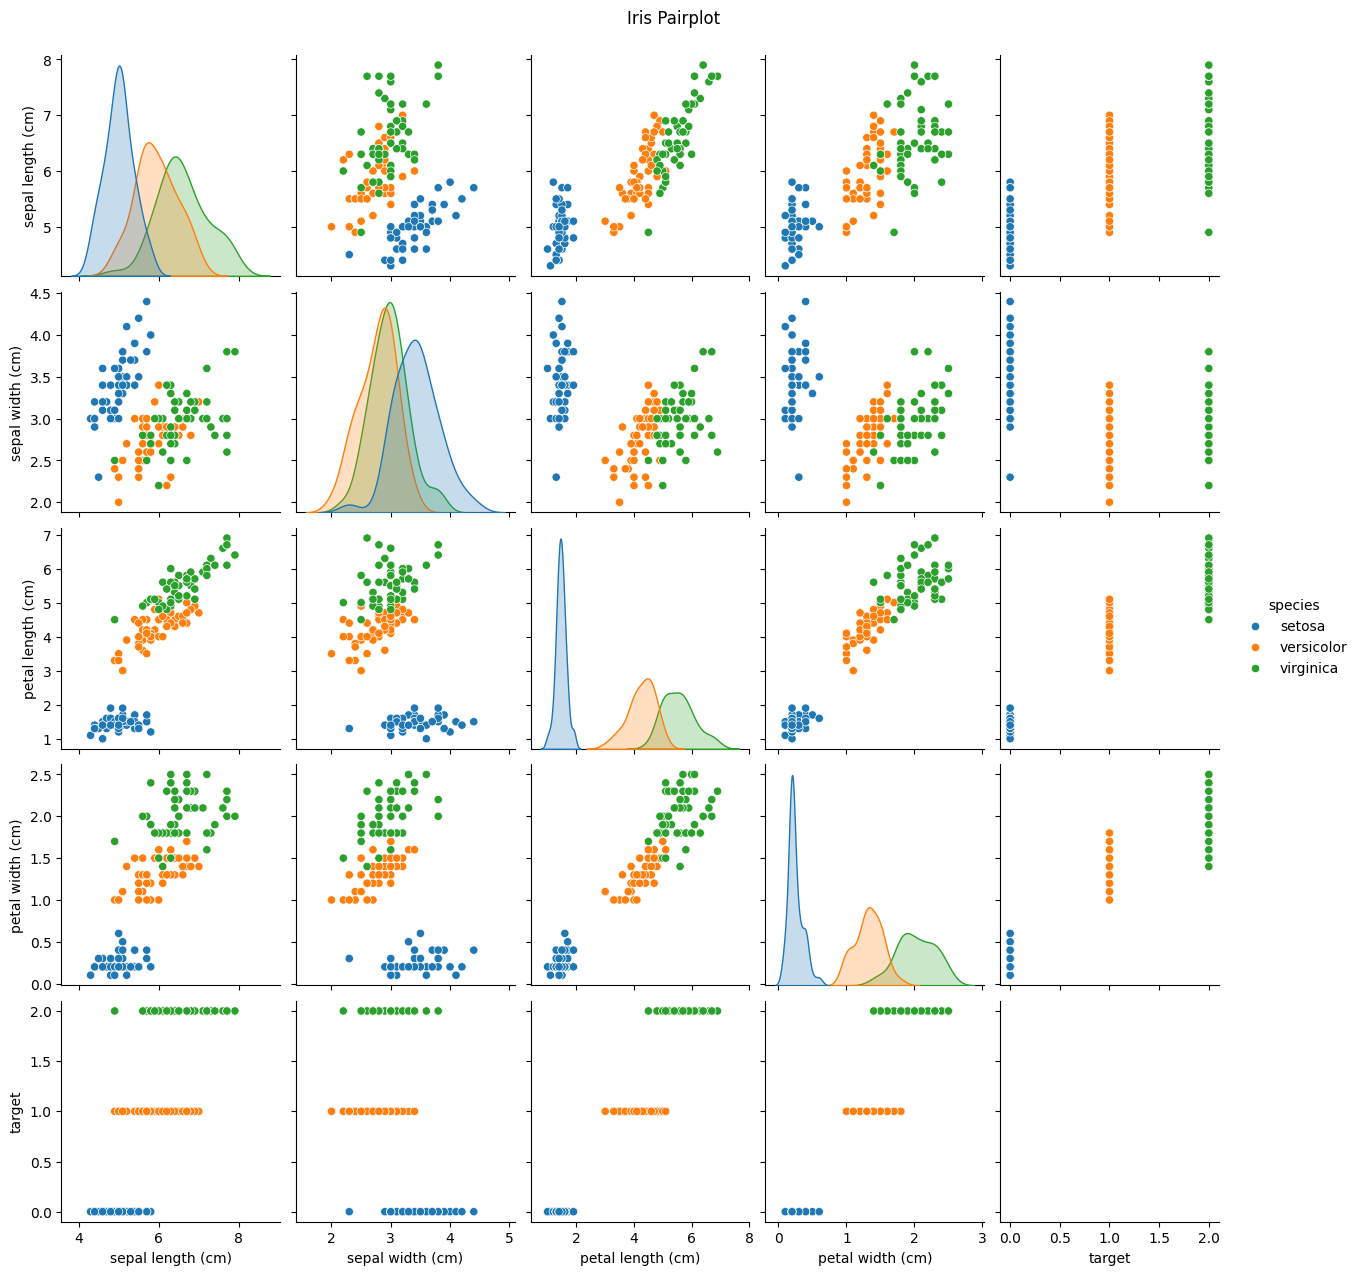

In [9]:
# 여집합에 대한 pairplot
sns.pairplot(df, hue='species')
plt.Figure(figsize=(15,10))
plt.suptitle('Iris Pairplot', y=1.02)
plt.show()

In [10]:
# 여집합에서 무작위 10개 추출
select = wrong_prediction.sample(n=10, random_state=42)
select

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
83,6.0,2.7,5.1,1.6,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
70,5.9,3.2,4.8,1.8,1,versicolor
45,4.8,3.0,1.4,0.3,0,setosa
44,5.1,3.8,1.9,0.4,0,setosa
39,5.1,3.4,1.5,0.2,0,setosa
22,4.6,3.6,1.0,0.2,0,setosa
80,5.5,2.4,3.8,1.1,1,versicolor
10,5.4,3.7,1.5,0.2,0,setosa
0,5.1,3.5,1.4,0.2,0,setosa


In [11]:
# 추출한 샘플에 대한 모델 정확도 측정
from sklearn.metrics import accuracy_score

In [12]:
x_select = select[iris.feature_names]
y_select = select['species']
y_prediction = iris1.predict(x_select)

accuracy = accuracy_score(y_select, y_prediction)
print(f'예측 정확도: {accuracy* 100:.2f}%')


예측 정확도: 100.00%


In [13]:
accuracy

1.0